# GPU checking

In [ ]:
!nvidia-smi

Wed Aug 21 14:24:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# installation of ultralytics for yolo

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 14.8 MB/s eta 0:00:00


# importing necessary libraries

In [ ]:
from ultralytics import YOLO
from ipywidgets import Image, Output, HBox, VBox
from IPython.display import display
from IPython import display
from google.colab.patches import cv2_imshow
display.clear_output()
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 771, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'train', 'predict', 'track', 'export', 'val', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'classify', 'obb', 'segment'}
                MODE (required) is one of {'train', 'predict', 'track', 'export', 'val', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# changing the directory path

In [ ]:
%cd /content/drive/MyDrive/Dissertation Dataset/models

/content/drive/MyDrive/Dissertation Dataset/models


In [ ]:
%pwd

'/content/drive/MyDrive/Dissertation Dataset/models'

# loading pre trained model

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')
save_directory = '/content/drive/MyDrive/Dissertation Dataset/models'
model.export(format='onnx', save_dir=save_directory)
model.train(data='/content/drive/MyDrive/BNG.v1i.yolov8/data.yaml', epochs=200, imgsz=640,save_dir=save_directory)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from 'yolov8m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 173.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 21.1s, saved as 'yolov8m.onnx' (99.0 MB)

Export complete (24.3s)
Results saved to /content/drive/MyDrive/Dissertation Dataset/models
Predict:         yolo predict task=detect model=yolov8m.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8m.onnx imgsz=640 data=coco.yaml  
Visualize:      

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/drive/MyDrive/BNG.v1i.yolov8/train/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/BNG.v1i.yolov8/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      2.724       4.68      2.143        185        640: 100%|██████████| 4/4 [02:23<00:00, 35.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.45s/it]

                   all         10        128      0.447    0.00649    0.00417    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G      2.628      4.239      2.129        154        640: 100%|██████████| 4/4 [01:22<00:00, 20.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all         10        128      0.613     0.0227     0.0245       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G      2.552      3.411      1.995        304        640: 100%|██████████| 4/4 [01:19<00:00, 19.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]

                   all         10        128      0.373      0.131     0.0441     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G      2.325      2.712      1.823        263        640: 100%|██████████| 4/4 [01:19<00:00, 19.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.96s/it]

                   all         10        128      0.261       0.11     0.0606     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G      2.311      2.671      1.772        226        640: 100%|██████████| 4/4 [01:19<00:00, 19.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]

                   all         10        128      0.413     0.0911     0.0676     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      2.143      2.502      1.752        145        640: 100%|██████████| 4/4 [01:18<00:00, 19.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]

                   all         10        128      0.568      0.107     0.0736     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G      2.126      2.417      1.764        242        640: 100%|██████████| 4/4 [01:17<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all         10        128      0.386      0.145     0.0777     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G      2.139      2.368      1.684        222        640: 100%|██████████| 4/4 [01:16<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         10        128      0.217     0.0981     0.0589     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G      2.061      2.248      1.675        125        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]

                   all         10        128      0.413      0.183      0.075     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G      2.042      2.211      1.661        282        640: 100%|██████████| 4/4 [01:15<00:00, 18.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         10        128      0.677       0.12     0.0792     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G      2.024      2.108      1.619        204        640: 100%|██████████| 4/4 [01:15<00:00, 18.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         10        128      0.754     0.0765     0.0854     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G       1.95      2.039      1.606        161        640: 100%|██████████| 4/4 [01:15<00:00, 18.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]

                   all         10        128      0.457      0.112     0.0921     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G      1.924      1.907      1.548        147        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         10        128      0.259      0.148     0.0876     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G      1.833       1.83      1.505        235        640: 100%|██████████| 4/4 [01:16<00:00, 19.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all         10        128      0.221      0.217     0.0962     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G      1.891      1.841      1.531        243        640: 100%|██████████| 4/4 [01:17<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         10        128      0.389      0.163     0.0615     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G      1.866      1.758      1.523        198        640: 100%|██████████| 4/4 [01:15<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         10        128       0.62       0.11      0.137     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G       1.81      1.752      1.567        197        640: 100%|██████████| 4/4 [01:16<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.376      0.137      0.148     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G       1.87      1.841      1.599        172        640: 100%|██████████| 4/4 [01:15<00:00, 18.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         10        128     0.0822      0.225     0.0504     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G      1.817      1.695       1.55        330        640: 100%|██████████| 4/4 [01:16<00:00, 19.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         10        128      0.357      0.153      0.117      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G      1.812      1.722      1.498        274        640: 100%|██████████| 4/4 [01:16<00:00, 19.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         10        128      0.295      0.157     0.0732     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G      1.836      1.646      1.497        250        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         10        128      0.367     0.0871     0.0461     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G      1.663      1.547      1.465        204        640: 100%|██████████| 4/4 [01:15<00:00, 18.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         10        128      0.253      0.143     0.0901     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G      1.689      1.537      1.451        251        640: 100%|██████████| 4/4 [01:15<00:00, 18.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         10        128      0.587     0.0925      0.101     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G      1.738      1.638      1.483        185        640: 100%|██████████| 4/4 [01:16<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         10        128      0.286      0.197      0.128     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      1.637      1.483       1.42        206        640: 100%|██████████| 4/4 [01:14<00:00, 18.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         10        128      0.316      0.226      0.112     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G      1.616      1.419      1.405        273        640: 100%|██████████| 4/4 [01:15<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         10        128      0.394      0.163      0.104     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G      1.749      1.584      1.475        235        640: 100%|██████████| 4/4 [01:16<00:00, 19.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         10        128      0.133      0.147     0.0871     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G      1.608        1.4      1.392        156        640: 100%|██████████| 4/4 [01:15<00:00, 18.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128     0.0897     0.0893     0.0622      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G      1.646       1.39      1.398        250        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         10        128     0.0575      0.187     0.0674     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G      1.736      1.467      1.467        202        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         10        128     0.0797     0.0818     0.0482     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G       1.64      1.401      1.399        164        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128     0.0961     0.0671     0.0526     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G      1.606      1.472        1.4        223        640: 100%|██████████| 4/4 [01:15<00:00, 18.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128     0.0702      0.116     0.0652     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G      1.613      1.382      1.395        134        640: 100%|██████████| 4/4 [01:15<00:00, 18.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         10        128      0.312     0.0766     0.0876      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G      1.545      1.307      1.332        201        640: 100%|██████████| 4/4 [01:16<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         10        128      0.278     0.0957      0.087     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G      1.522      1.274      1.314        157        640: 100%|██████████| 4/4 [01:14<00:00, 18.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         10        128      0.271      0.106     0.0756      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200         0G      1.511      1.258      1.329        215        640: 100%|██████████| 4/4 [01:15<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128      0.279      0.253     0.0992     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200         0G       1.53      1.263      1.334        177        640: 100%|██████████| 4/4 [01:14<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         10        128      0.286      0.214      0.137     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200         0G      1.565      1.297       1.35        167        640: 100%|██████████| 4/4 [01:16<00:00, 19.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         10        128      0.307      0.233       0.13     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200         0G      1.471      1.195      1.298        212        640: 100%|██████████| 4/4 [01:16<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         10        128      0.385      0.149      0.129     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200         0G      1.443      1.217      1.279        163        640: 100%|██████████| 4/4 [01:15<00:00, 18.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128       0.28      0.181     0.0858     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200         0G      1.404      1.162      1.269        245        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.329      0.166      0.116     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200         0G      1.436      1.179      1.287        136        640: 100%|██████████| 4/4 [01:16<00:00, 19.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.348      0.169      0.152     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200         0G      1.407      1.165      1.294        295        640: 100%|██████████| 4/4 [01:17<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

                   all         10        128      0.189       0.15      0.124     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200         0G      1.446      1.179      1.335        171        640: 100%|██████████| 4/4 [01:17<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         10        128      0.291      0.121     0.0946     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200         0G      1.409      1.149      1.264        244        640: 100%|██████████| 4/4 [01:17<00:00, 19.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         10        128       0.13      0.211     0.0956     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G      1.308      1.017      1.217        169        640: 100%|██████████| 4/4 [01:16<00:00, 19.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         10        128      0.165      0.213      0.115     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G      1.365      1.086      1.239        245        640: 100%|██████████| 4/4 [01:17<00:00, 19.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128      0.274      0.239      0.126     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G      1.304      1.083      1.226        147        640: 100%|██████████| 4/4 [01:17<00:00, 19.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.176       0.24      0.146     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G      1.403      1.067      1.229        233        640: 100%|██████████| 4/4 [01:17<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.349      0.218      0.159     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G      1.345      1.051      1.238        214        640: 100%|██████████| 4/4 [01:16<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]

                   all         10        128      0.384      0.142      0.142     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G      1.332      1.018      1.213        238        640: 100%|██████████| 4/4 [01:17<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.388       0.15      0.148     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G      1.259     0.9831      1.179        152        640: 100%|██████████| 4/4 [01:17<00:00, 19.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         10        128       0.38      0.141      0.135     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G      1.319      1.036      1.217        178        640: 100%|██████████| 4/4 [01:16<00:00, 19.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128       0.36      0.152      0.142     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G      1.278     0.9354      1.176        247        640: 100%|██████████| 4/4 [01:17<00:00, 19.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.297      0.234      0.123     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G      1.286       0.92      1.161        259        640: 100%|██████████| 4/4 [01:17<00:00, 19.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         10        128      0.282       0.15      0.114     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G      1.338     0.9761      1.214        252        640: 100%|██████████| 4/4 [01:17<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.249      0.192      0.105      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G      1.231     0.8864      1.137        249        640: 100%|██████████| 4/4 [01:18<00:00, 19.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.219       0.22       0.08     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G      1.243     0.9164      1.174        171        640: 100%|██████████| 4/4 [01:17<00:00, 19.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         10        128      0.273      0.106     0.0913     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G      1.221     0.8753      1.162        210        640: 100%|██████████| 4/4 [01:18<00:00, 19.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.261      0.139      0.108     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G       1.33     0.9693      1.213        216        640: 100%|██████████| 4/4 [01:17<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.341      0.154      0.119     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G      1.178     0.9106      1.125        181        640: 100%|██████████| 4/4 [01:17<00:00, 19.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.504      0.143      0.144     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G       1.18     0.8691      1.121        270        640: 100%|██████████| 4/4 [01:16<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128       0.27      0.129      0.101     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200         0G      1.153     0.8892      1.114        234        640: 100%|██████████| 4/4 [01:17<00:00, 19.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         10        128      0.275      0.117        0.1     0.0448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200         0G        1.1     0.8537      1.102        340        640: 100%|██████████| 4/4 [01:17<00:00, 19.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.287      0.117      0.095     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         0G      1.112     0.8019       1.09        181        640: 100%|██████████| 4/4 [01:16<00:00, 19.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         10        128      0.281      0.121     0.0974     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200         0G      1.151     0.8391      1.119        290        640: 100%|██████████| 4/4 [01:17<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.298      0.104      0.106     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200         0G      1.127     0.8592      1.119        218        640: 100%|██████████| 4/4 [01:15<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.271      0.149      0.121     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         0G      1.152     0.8441      1.113        177        640: 100%|██████████| 4/4 [01:15<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.458       0.11      0.106     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         0G       1.03     0.7702       1.08        185        640: 100%|██████████| 4/4 [01:16<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.427      0.156       0.11     0.0491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200         0G      1.138     0.8153      1.108        211        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all         10        128      0.247      0.242      0.135     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200         0G      1.085     0.7819      1.085        204        640: 100%|██████████| 4/4 [01:15<00:00, 18.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         10        128       0.29      0.243      0.152     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200         0G      1.187     0.8252      1.105        238        640: 100%|██████████| 4/4 [01:15<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.288      0.244      0.142     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         0G      1.077     0.7863      1.095        195        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.295      0.177      0.133     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200         0G      1.054     0.7603      1.086        221        640: 100%|██████████| 4/4 [01:16<00:00, 19.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.314      0.143      0.135      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200         0G      1.089      0.793      1.082        228        640: 100%|██████████| 4/4 [01:16<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.496      0.141      0.148      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200         0G      1.003     0.6863      1.042        183        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.487      0.163      0.157     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200         0G      1.068     0.7643      1.078        199        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.485      0.163       0.16     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200         0G      1.097       0.77      1.074        226        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.495      0.131       0.15     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200         0G      1.015     0.7094      1.039        267        640: 100%|██████████| 4/4 [01:14<00:00, 18.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all         10        128      0.447      0.176      0.153     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200         0G     0.9934     0.7394      1.035        216        640: 100%|██████████| 4/4 [01:12<00:00, 18.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.458      0.167      0.155     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         0G       1.04     0.7697      1.097        202        640: 100%|██████████| 4/4 [01:13<00:00, 18.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.497      0.139      0.151     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200         0G      1.071     0.7265      1.076        294        640: 100%|██████████| 4/4 [01:14<00:00, 18.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.484      0.144      0.146      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200         0G      1.046     0.6916      1.046        162        640: 100%|██████████| 4/4 [01:14<00:00, 18.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.565      0.111       0.14     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200         0G     0.9583     0.6895      1.023        215        640: 100%|██████████| 4/4 [01:14<00:00, 18.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.471      0.128      0.137     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200         0G     0.9938     0.6957      1.027        237        640: 100%|██████████| 4/4 [01:13<00:00, 18.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all         10        128      0.475      0.118      0.135     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200         0G       0.98     0.6918      1.036        240        640: 100%|██████████| 4/4 [01:14<00:00, 18.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.467      0.148      0.148     0.0544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200         0G     0.9492      0.686      1.041        199        640: 100%|██████████| 4/4 [01:15<00:00, 18.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         10        128      0.475      0.144      0.153     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         0G     0.9609     0.6599      1.032        137        640: 100%|██████████| 4/4 [01:14<00:00, 18.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.537      0.112      0.144     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         0G      1.008      0.687      1.042        193        640: 100%|██████████| 4/4 [01:15<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.499      0.123      0.135     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200         0G     0.8811     0.6106      1.006        178        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

                   all         10        128      0.485      0.128       0.13     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200         0G     0.9289     0.6572       1.01        162        640: 100%|██████████| 4/4 [01:16<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128      0.269      0.226      0.126     0.0482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200         0G     0.9293     0.6101     0.9942        261        640: 100%|██████████| 4/4 [01:15<00:00, 18.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128       0.27      0.226      0.129     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200         0G     0.9245     0.6161     0.9998        186        640: 100%|██████████| 4/4 [01:15<00:00, 18.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.358     0.0973      0.119     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200         0G     0.9612     0.6319     0.9941        261        640: 100%|██████████| 4/4 [01:16<00:00, 19.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.526     0.0973      0.118     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200         0G     0.9475     0.6269      1.024        237        640: 100%|██████████| 4/4 [01:15<00:00, 18.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all         10        128      0.551     0.0973      0.124     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200         0G     0.9144       0.61     0.9809        247        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.548     0.0928       0.12     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200         0G     0.9349      0.624     0.9953        245        640: 100%|██████████| 4/4 [01:14<00:00, 18.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.516     0.0916      0.129     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200         0G      1.005     0.6497      1.031        209        640: 100%|██████████| 4/4 [01:15<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.569     0.0977      0.149     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200         0G     0.8752     0.6054     0.9914        215        640: 100%|██████████| 4/4 [01:14<00:00, 18.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.157      0.125      0.136     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200         0G     0.8957      0.574     0.9712        293        640: 100%|██████████| 4/4 [01:15<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.145      0.155      0.146     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         0G     0.8622     0.5487      0.973        286        640: 100%|██████████| 4/4 [01:15<00:00, 18.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.153      0.145       0.14     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200         0G     0.8779     0.5973      0.979        193        640: 100%|██████████| 4/4 [01:14<00:00, 18.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128       0.17      0.149      0.143     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200         0G     0.8713     0.5681     0.9772        235        640: 100%|██████████| 4/4 [01:14<00:00, 18.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.319      0.169      0.151     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200         0G     0.8334     0.5609      0.977        157        640: 100%|██████████| 4/4 [01:14<00:00, 18.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.494      0.143      0.148     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200         0G     0.8562     0.5879     0.9671        272        640: 100%|██████████| 4/4 [01:16<00:00, 19.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         10        128      0.537      0.133       0.15     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200         0G     0.8933     0.5921     0.9952        213        640: 100%|██████████| 4/4 [01:15<00:00, 18.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         10        128      0.504      0.135      0.141       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200         0G       0.93     0.5867      1.005        157        640: 100%|██████████| 4/4 [01:14<00:00, 18.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.306      0.146      0.142     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200         0G     0.8552     0.5619     0.9705        171        640: 100%|██████████| 4/4 [01:15<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.145      0.192      0.143     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200         0G     0.8509     0.5905     0.9937        148        640: 100%|██████████| 4/4 [01:14<00:00, 18.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.138      0.177      0.141     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200         0G     0.8548     0.5533     0.9683        249        640: 100%|██████████| 4/4 [01:13<00:00, 18.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.284      0.181      0.142     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200         0G     0.7802     0.5413     0.9679        151        640: 100%|██████████| 4/4 [01:14<00:00, 18.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.303      0.143      0.142     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200         0G     0.8517     0.5445     0.9763        134        640: 100%|██████████| 4/4 [01:13<00:00, 18.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.304      0.151       0.15     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200         0G     0.8686     0.5692     0.9876        148        640: 100%|██████████| 4/4 [01:15<00:00, 18.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.477       0.15      0.152     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200         0G     0.8297     0.5243     0.9573        193        640: 100%|██████████| 4/4 [01:13<00:00, 18.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]

                   all         10        128       0.45      0.149      0.131      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200         0G     0.8151     0.5345     0.9812        158        640: 100%|██████████| 4/4 [01:15<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.501       0.13       0.14     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200         0G     0.8263     0.5446     0.9537        297        640: 100%|██████████| 4/4 [01:14<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.502       0.13      0.143     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200         0G     0.8326     0.5559     0.9828        176        640: 100%|██████████| 4/4 [01:13<00:00, 18.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]

                   all         10        128      0.467      0.142      0.147     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200         0G     0.8618     0.5415     0.9778        202        640: 100%|██████████| 4/4 [01:14<00:00, 18.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.511      0.123      0.148     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200         0G     0.7461     0.5058      0.961        223        640: 100%|██████████| 4/4 [01:14<00:00, 18.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]

                   all         10        128      0.478      0.139      0.146     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200         0G     0.8371     0.5262     0.9623        206        640: 100%|██████████| 4/4 [01:16<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]

                   all         10        128      0.284      0.173      0.135     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200         0G     0.7945     0.5076     0.9364        267        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.481      0.127      0.139      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200         0G     0.7936      0.503     0.9412        203        640: 100%|██████████| 4/4 [01:16<00:00, 19.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.475      0.127      0.146     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200         0G     0.8028     0.5329     0.9597        271        640: 100%|██████████| 4/4 [01:14<00:00, 18.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.512      0.118      0.146     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200         0G     0.7511     0.4913     0.9362        225        640: 100%|██████████| 4/4 [01:14<00:00, 18.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         10        128      0.541      0.113      0.146     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         0G     0.7607      0.513     0.9521        209        640: 100%|██████████| 4/4 [01:15<00:00, 18.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.644      0.107      0.144     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200         0G     0.7799      0.508     0.9405        243        640: 100%|██████████| 4/4 [01:14<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.613      0.107      0.142      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200         0G     0.7853     0.5191     0.9482        218        640: 100%|██████████| 4/4 [01:15<00:00, 18.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.599      0.108      0.142     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200         0G     0.7241     0.4728     0.9291        214        640: 100%|██████████| 4/4 [01:14<00:00, 18.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128       0.48      0.138      0.148     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200         0G     0.7482     0.4938     0.9437        187        640: 100%|██████████| 4/4 [01:14<00:00, 18.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         10        128      0.485       0.13      0.151     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200         0G      0.734     0.4964     0.9339        216        640: 100%|██████████| 4/4 [01:15<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.468       0.13      0.145     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200         0G     0.7415     0.5076     0.9472        268        640: 100%|██████████| 4/4 [01:16<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.473       0.12      0.143     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200         0G     0.7174     0.5159     0.9627        156        640: 100%|██████████| 4/4 [01:15<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.542       0.11      0.136     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200         0G     0.7333     0.4729     0.9362        200        640: 100%|██████████| 4/4 [01:15<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.538      0.109       0.13     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200         0G     0.7311     0.4994      0.934        196        640: 100%|██████████| 4/4 [01:15<00:00, 18.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.494      0.124      0.131     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200         0G     0.6932     0.4659      0.921        134        640: 100%|██████████| 4/4 [01:16<00:00, 19.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.501      0.128       0.13     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200         0G     0.7069     0.4393     0.9003        208        640: 100%|██████████| 4/4 [01:16<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.493       0.13       0.13     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200         0G     0.7558     0.4847     0.9131        236        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128       0.49      0.126      0.131     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200         0G     0.7198     0.4745     0.9214        158        640: 100%|██████████| 4/4 [01:15<00:00, 18.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         10        128      0.567      0.119      0.141     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200         0G     0.7094     0.4669     0.9125        230        640: 100%|██████████| 4/4 [01:19<00:00, 19.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all         10        128      0.533      0.124      0.145     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200         0G      0.715     0.4674     0.9138        259        640: 100%|██████████| 4/4 [01:18<00:00, 19.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         10        128      0.555      0.116      0.145     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200         0G     0.7372     0.4785     0.9226        197        640: 100%|██████████| 4/4 [01:16<00:00, 19.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         10        128       0.55      0.119      0.145     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200         0G     0.7554     0.4813     0.9158        244        640: 100%|██████████| 4/4 [01:16<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.515      0.109      0.142     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200         0G     0.7341     0.4713     0.9156        239        640: 100%|██████████| 4/4 [01:14<00:00, 18.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.525      0.112      0.146     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200         0G      0.662     0.4362     0.9029        144        640: 100%|██████████| 4/4 [01:15<00:00, 19.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.502      0.118      0.139     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200         0G      0.707     0.4413     0.9152        167        640: 100%|██████████| 4/4 [01:16<00:00, 19.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.504      0.119      0.135     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200         0G     0.6809      0.417     0.8915        257        640: 100%|██████████| 4/4 [01:15<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.489      0.121       0.14     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200         0G     0.6873     0.4475     0.8943        194        640: 100%|██████████| 4/4 [01:16<00:00, 19.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128      0.487      0.118      0.131     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200         0G     0.6628     0.4318     0.9231        215        640: 100%|██████████| 4/4 [01:15<00:00, 18.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.494      0.114      0.138     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200         0G     0.7309      0.466      0.915        200        640: 100%|██████████| 4/4 [01:15<00:00, 18.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.496      0.113      0.144     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200         0G     0.6804     0.4361      0.897        203        640: 100%|██████████| 4/4 [01:16<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.478      0.105      0.133     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200         0G     0.6466     0.4192     0.8984        228        640: 100%|██████████| 4/4 [01:16<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         10        128      0.506      0.109      0.135     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200         0G     0.6492     0.4162     0.9052        229        640: 100%|██████████| 4/4 [01:16<00:00, 19.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.494      0.109      0.132      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200         0G     0.6696     0.4177     0.8884        244        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         10        128      0.492      0.109      0.134      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200         0G     0.6552     0.4266     0.9133        175        640: 100%|██████████| 4/4 [01:15<00:00, 18.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.483      0.109      0.135     0.0576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200         0G     0.6489     0.4101     0.8773        247        640: 100%|██████████| 4/4 [01:16<00:00, 19.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.493      0.113      0.136     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200         0G     0.6639     0.4221     0.9007        172        640: 100%|██████████| 4/4 [01:16<00:00, 19.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]

                   all         10        128      0.526      0.112      0.141     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200         0G     0.6419     0.4328     0.8998        144        640: 100%|██████████| 4/4 [01:17<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

                   all         10        128      0.526      0.112      0.139     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200         0G     0.6351     0.4198     0.8958        251        640: 100%|██████████| 4/4 [01:16<00:00, 19.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all         10        128      0.525      0.112      0.136     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200         0G     0.6559     0.4343     0.9214        105        640: 100%|██████████| 4/4 [01:16<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.538      0.111      0.137     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200         0G     0.6336      0.392     0.8805        246        640: 100%|██████████| 4/4 [01:16<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.519      0.109      0.133     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200         0G     0.6285     0.4212     0.8875        130        640: 100%|██████████| 4/4 [01:17<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.531      0.109      0.136     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200         0G     0.6157     0.4051     0.9039        247        640: 100%|██████████| 4/4 [01:18<00:00, 19.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         10        128      0.526      0.112      0.136     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200         0G     0.6345      0.419      0.909        162        640: 100%|██████████| 4/4 [01:17<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.514      0.112      0.132     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200         0G     0.6529     0.4118     0.8903        176        640: 100%|██████████| 4/4 [01:16<00:00, 19.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.499      0.112      0.131     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200         0G     0.6377     0.3916     0.8799        173        640: 100%|██████████| 4/4 [01:15<00:00, 18.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]

                   all         10        128      0.485      0.118      0.131     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200         0G     0.6335     0.3961     0.8773        301        640: 100%|██████████| 4/4 [01:15<00:00, 18.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.464      0.138      0.136     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200         0G     0.6307     0.4147     0.9021        299        640: 100%|██████████| 4/4 [01:14<00:00, 18.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.462      0.131      0.138     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200         0G     0.6519     0.4265     0.8948        231        640: 100%|██████████| 4/4 [01:15<00:00, 18.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.477       0.12       0.14     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200         0G     0.6125     0.3841     0.8736        199        640: 100%|██████████| 4/4 [01:15<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]

                   all         10        128       0.49      0.113      0.139     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200         0G     0.6213     0.4022      0.877        256        640: 100%|██████████| 4/4 [01:15<00:00, 18.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all         10        128      0.486      0.113      0.148     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200         0G     0.6196     0.3894     0.8802        347        640: 100%|██████████| 4/4 [01:15<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.449      0.135      0.146     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200         0G     0.6127     0.4032     0.8991        224        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.482      0.113      0.144     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200         0G     0.6081     0.3914     0.9094        174        640: 100%|██████████| 4/4 [01:14<00:00, 18.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         10        128      0.482      0.113      0.145     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200         0G     0.5561     0.3759     0.8775        145        640: 100%|██████████| 4/4 [01:14<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         10        128      0.426      0.147      0.146     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200         0G     0.6068     0.3881     0.8887        202        640: 100%|██████████| 4/4 [01:14<00:00, 18.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.428      0.139      0.146      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200         0G     0.5653     0.3702     0.8754        160        640: 100%|██████████| 4/4 [01:15<00:00, 18.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.432       0.14      0.143     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200         0G     0.5744     0.3701     0.8647        293        640: 100%|██████████| 4/4 [01:14<00:00, 18.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.481      0.131      0.143     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200         0G     0.5907     0.3834     0.8746        254        640: 100%|██████████| 4/4 [01:14<00:00, 18.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.491      0.139      0.142     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200         0G     0.5801     0.3866     0.8696        228        640: 100%|██████████| 4/4 [01:16<00:00, 19.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.496       0.14      0.143     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200         0G     0.5544     0.3679     0.8651        201        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         10        128      0.478      0.124      0.129     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200         0G      0.591     0.3986     0.8942        231        640: 100%|██████████| 4/4 [01:15<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.483      0.118      0.125       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200         0G     0.5729     0.3671     0.8739        292        640: 100%|██████████| 4/4 [01:14<00:00, 18.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all         10        128      0.481      0.114      0.125     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200         0G     0.5687     0.3847     0.8788        238        640: 100%|██████████| 4/4 [01:14<00:00, 18.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         10        128      0.474      0.118      0.126       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200         0G     0.5632     0.3705     0.8796        241        640: 100%|██████████| 4/4 [01:15<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all         10        128      0.479       0.12       0.12     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200         0G      0.583      0.377     0.8706        154        640: 100%|██████████| 4/4 [01:15<00:00, 18.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         10        128      0.484      0.121      0.119     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200         0G     0.5419     0.3521     0.8738        284        640: 100%|██████████| 4/4 [01:16<00:00, 19.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128       0.48      0.121      0.126     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200         0G     0.5426     0.3489     0.8726        220        640: 100%|██████████| 4/4 [01:16<00:00, 19.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         10        128      0.505      0.112      0.128     0.0515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200         0G     0.5679      0.356     0.8571        247        640: 100%|██████████| 4/4 [01:14<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all         10        128      0.506      0.113       0.13     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200         0G     0.5135     0.3405     0.8718        207        640: 100%|██████████| 4/4 [01:13<00:00, 18.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         10        128      0.507      0.113       0.13     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200         0G     0.5384     0.3505     0.8656        131        640: 100%|██████████| 4/4 [01:14<00:00, 18.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         10        128      0.501       0.11      0.129     0.0533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200         0G      0.578     0.4356     0.8657        113        640: 100%|██████████| 4/4 [01:17<00:00, 19.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128      0.497       0.11       0.13     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200         0G     0.5892     0.3993     0.8691        159        640: 100%|██████████| 4/4 [01:15<00:00, 18.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all         10        128       0.47      0.128      0.133      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200         0G     0.6006     0.4307     0.8807        158        640: 100%|██████████| 4/4 [01:15<00:00, 18.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         10        128      0.453      0.149       0.14     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200         0G     0.5672     0.3569      0.872        155        640: 100%|██████████| 4/4 [01:15<00:00, 18.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         10        128      0.446      0.157      0.142     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200         0G      0.531     0.3407     0.8465        104        640: 100%|██████████| 4/4 [01:14<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

                   all         10        128      0.485      0.121      0.143     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200         0G     0.5761     0.3748     0.8553        124        640: 100%|██████████| 4/4 [01:15<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         10        128      0.482      0.127      0.142     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200         0G     0.5415     0.3606     0.8574        137        640: 100%|██████████| 4/4 [01:15<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]

                   all         10        128      0.486      0.128      0.141     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200         0G     0.5611     0.3719      0.863        108        640: 100%|██████████| 4/4 [01:15<00:00, 18.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         10        128      0.487      0.128       0.14     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200         0G     0.5041     0.3375     0.8544        165        640: 100%|██████████| 4/4 [01:15<00:00, 18.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         10        128      0.488      0.128      0.139     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200         0G      0.516      0.326     0.8483         92        640: 100%|██████████| 4/4 [01:14<00:00, 18.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         10        128      0.487      0.127      0.138      0.054



200 epochs completed in 4.521 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]


                   all         10        128      0.146      0.192      0.142     0.0684
            goldenrods          6         44      0.271      0.341      0.261     0.0948
                 grass          7         25      0.625      0.466      0.476       0.23
           meadowsweet          1         15          0          0     0.0102    0.00204
       morning glories          2          9     0.0849      0.444      0.164      0.101
    purple loosestrife          3         32     0.0398     0.0938     0.0643     0.0321
                  tree          1          2          0          0     0.0209     0.0188
                 water          1          1          0          0          0          0
Speed: 0.6ms preprocess, 358.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78da3c1d4b20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# testing of the model


image 1/1 /content/drive/MyDrive/detectron2/data/test/images/DJI_0634_JPG.rf.c6dd197761c3fcfe744a328404519547.jpg: 640x640 5 goldenrodss, 1 grass, 476.3ms
Speed: 2.2ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


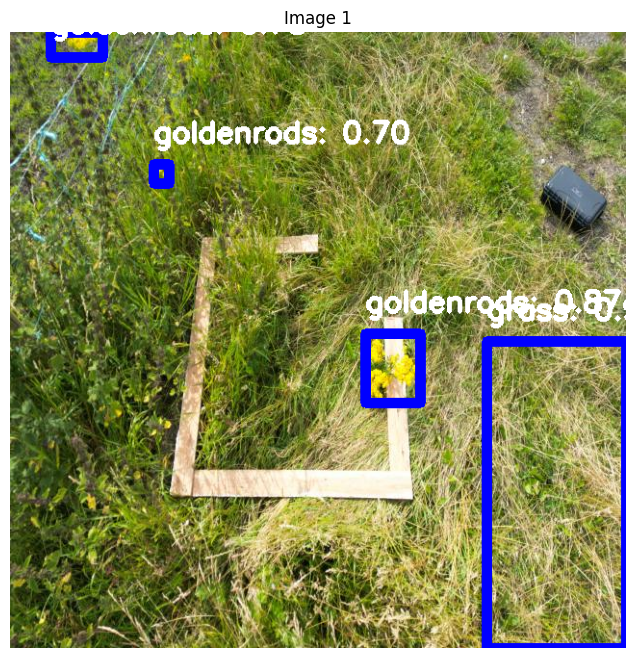


image 1/1 /content/drive/MyDrive/detectron2/data/test/images/DJI_0622_JPG.rf.1b59bb7ca786cc9a5b000241faeed754.jpg: 640x640 1 goldenrods, 1 grass, 526.6ms
Speed: 3.9ms preprocess, 526.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


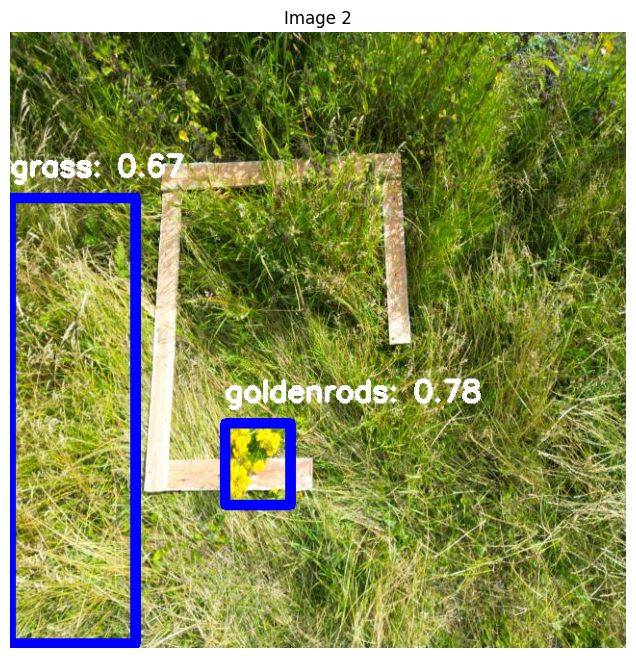


image 1/1 /content/drive/MyDrive/detectron2/data/test/images/DJI_0635_JPG.rf.ffa7688d0bdfa15d2d3f57e8d657c689.jpg: 640x640 5 goldenrodss, 2 grasss, 610.2ms
Speed: 2.0ms preprocess, 610.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


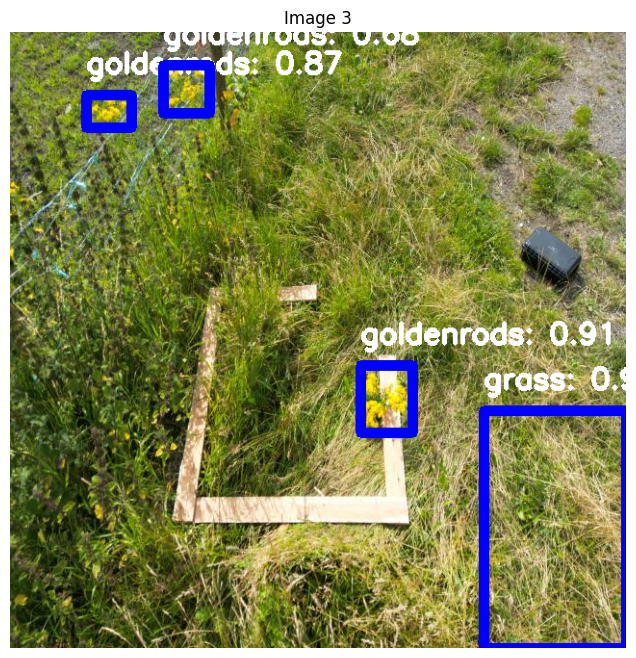


image 1/1 /content/drive/MyDrive/detectron2/data/test/images/DJI_0636_JPG.rf.cc873c7df868a6ec1970a54f3090e3d5.jpg: 640x640 4 goldenrodss, 2 grasss, 1 openarea, 738.9ms
Speed: 22.5ms preprocess, 738.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


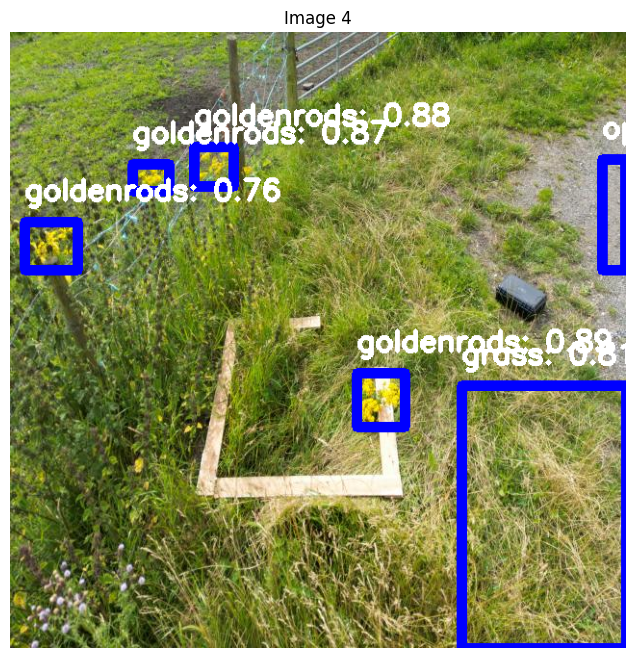

In [ ]:
folder_path = '/content/drive/MyDrive/detectron2/data/test/images'
model_path="/content/drive/MyDrive/Dissertation Dataset/models/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)
i = 0
for filename in os.listdir(folder_path):
    i=i+1
    image_path = os.path.join(folder_path, filename)
    results = model(image_path)
    image = results[0].orig_img

    for r in results:
      boxes=r.boxes.xyxy.cpu().numpy()
      confidences=r.boxes.conf.cpu().numpy()
      class_ids=r.boxes.cls.cpu().numpy()
      class_names=r.names
      for (b, c, c_id) in zip(boxes, confidences, class_ids):
          if c < 0.4:  # threshold value
              continue
          x1, y1, x2, y2 = map(int, b)
          h, w = image.shape[:2]
          x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)
          box_color = (255, 0, 0)
          box_thickness = 10
          cv2.rectangle(image, (x1, y1), (x2, y2), box_color, box_thickness)
          label = f'{class_names[int(c_id)]}: {c:.2f}'
          text_color = (255, 255, 255)  # white color code
          font_scale = 1                # font size
          font_thickness = 4            
          label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)[0]
          label_y = max(y1 - label_size[1], 0)
          cv2.putText(image, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_color, font_thickness)
      image_rgb_display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.figure(figsize=(10, 8))
      plt.title(f"Image {i}")
      plt.imshow(image_rgb_display)
      plt.axis('off')
      plt.show()


# evaluation mode

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Dissertation Dataset/models/runs/detect/train2/weights/best.pt')

results = model.val(data='/content/drive/MyDrive/detectron2/data/data.yaml')

Ultralytics YOLOv8.2.89 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.10MB/s]
val: Scanning /content/drive/MyDrive/BNG.v1i.yolov8/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]


                   all         10        128      0.146      0.192      0.142     0.0684
            goldenrods          6         44      0.271      0.341      0.261     0.0948
                 grass          7         25      0.625      0.466      0.476       0.23
           meadowsweet          1         15          0          0     0.0102    0.00204
       morning glories          2          9     0.0849      0.444      0.164      0.101
    purple loosestrife          3         32     0.0398     0.0938     0.0643     0.0321
                  tree          1          2          0          0     0.0209     0.0188
                 water          1          1          0          0          0          0
Speed: 0.2ms preprocess, 32.2ms inference, 0.0ms loss, 69.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import pandas as pd


csv_path = '/content/drive/MyDrive/Dissertation Dataset/models/runs/detect/train2/results.csv'  #path of results.csv
df = pd.read_csv(csv_path)

last_epoch = df.iloc[-1] #last epoch access

precision = last_epoch['   metrics/precision(B)']
recall = last_epoch['   metrics/precision(B)']
mAP50 = last_epoch['       metrics/mAP50(B)']
mAP50_95 = last_epoch['    metrics/mAP50-95(B)']
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP@0.5: {mAP50}")
print(f"mAP@0.5:0.95: {mAP50_95}")


Precision: 0.48661
Recall: 0.48661
mAP@0.5: 0.13775
mAP@0.5:0.95: 0.05399


In [ ]:
best_epoch = df.loc[df['    metrics/mAP50-95(B)'].idxmax()] #best weight epochs
print(f"Best Epoch Metrics:\nPrecision: {best_epoch['   metrics/precision(B)']}\nRecall: {best_epoch['      metrics/recall(B)']}\nmAP50: {best_epoch['    metrics/mAP50-95(B)']}\nmAP50-95: {best_epoch['    metrics/mAP50-95(B)']}")


Best Epoch Metrics:
Precision: 0.14508
Recall: 0.19224
mAP50: 0.06868
mAP50-95: 0.06868
